In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Advertising.csv')  
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
print(data.info())  
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  146.157500   23.264000   30.529000   14.022500
std     57.879185   86.454055   14.846809   21.810948    5.217457
min      1.000000    0.000000    0.000000    0.000000    1.600000
25%     50.750000   72.700000    9.975000   12.750000   10.375000
50%    100.500000  148.500000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400

In [4]:
print(data.isnull().sum()) 
data.fillna(0, inplace=True)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
X = data[['TV', 'Radio', 'Newspaper']] 
y = data['Sales']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
print(y_pred)

[16.47029363 20.96074077 21.47529514 10.83498682 22.15063396 13.26513889
 21.09127027  7.57890467 13.52890776 15.17769832  9.21427654  6.75243551
 14.27160567  9.11072182  9.69516348 12.15599402  8.94402469 16.2633267
 10.39521404 18.79928563 19.56249831 13.43537768 12.53759938 21.29781004
  7.91652966  5.90023636 20.79408657 12.01504767  9.26612943  8.70246224
 12.41149456 10.12453415 21.46087667 12.49783753 18.16242789 20.12106837
 14.26243942 20.79999892 11.07279291  4.68463452]


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.2867882275402125
R-squared: 0.8958677439085905


In [10]:
new_advertising = pd.DataFrame([[150, 30, 20]],columns=['TV', 'Radio', 'Newspaper'])

predicted_sales = model.predict(new_advertising)
print(f'Predicted Sales for TV=150, Radio=30, Newspaper=20: {predicted_sales[0]}')

Predicted Sales for TV=150, Radio=30, Newspaper=20: 15.483962382634534


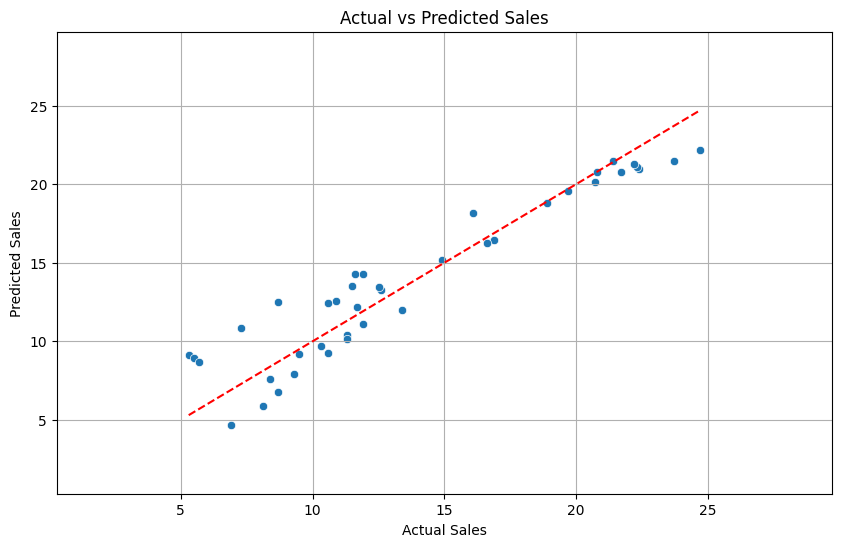

In [11]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Actual', y='Predicted')
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], 'r--') 
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.xlim(results['Actual'].min() - 5, results['Actual'].max() + 5)
plt.ylim(results['Actual'].min() - 5, results['Actual'].max() + 5)
plt.grid(True)
plt.show()

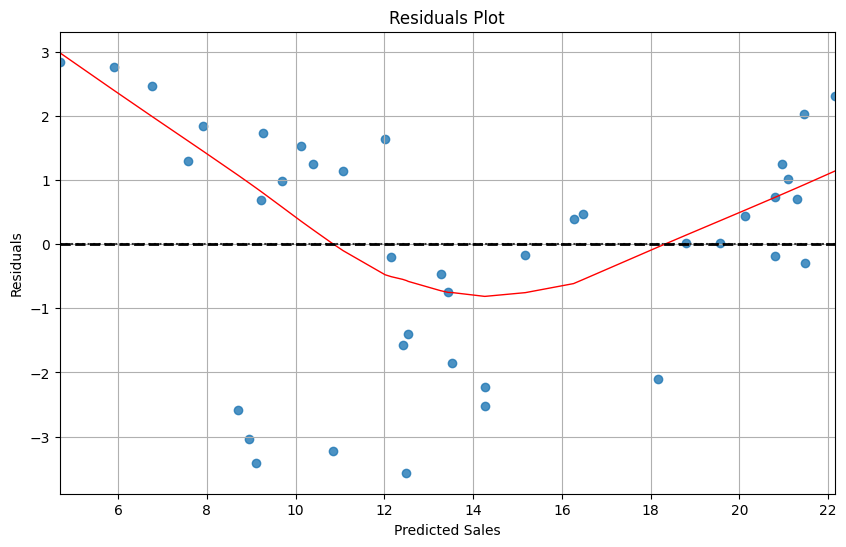

In [12]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.grid(True)
plt.show()